# Plots a bar graph representing the number of docstring errors.

To generate the file in `json` format, the following command needs to be executed in `master` branch clone of pandas,
after completing the development environment setup.

`./scripts/validate_docstrings.py --format=json > /path/to/json/pandas_docstring_errors.json`

In [1]:
import pandas

In [2]:
path = '../json/pandas_docstring_errors.json'
df = (pandas.read_json(path)
            .transpose())
df.drop(df.columns.difference(['errors']), 1, inplace = True)
df.reset_index(inplace = True)

Splits a list in a data entry into separate data rows

In [3]:
df = (df.errors.apply(pandas.Series)
        .merge(df, left_index = True, right_index = True)
        .drop(["errors"], axis = 1)
        .melt(id_vars = ['index'], value_name = "error")
        .drop("variable", axis = 1)
        .dropna()
        .rename(columns = {"index":"module_name"}))

Splits a list in a data entry into separate data columns

In [4]:
df[['error_code','error_name']] = pandas.DataFrame(df.error.tolist(), index = df.index)
df = df.drop("error", axis = 1)

### Frequency of errors based on error codes

In [5]:
pandas.DataFrame(df['error_code'].value_counts())

,error_code
GL08,517
PR09,459
PR01,405
RT03,355
PR07,319
SA04,310
PR06,267
EX03,247
PR02,237
SS06,212


### Frequency plot of errors based on error codes

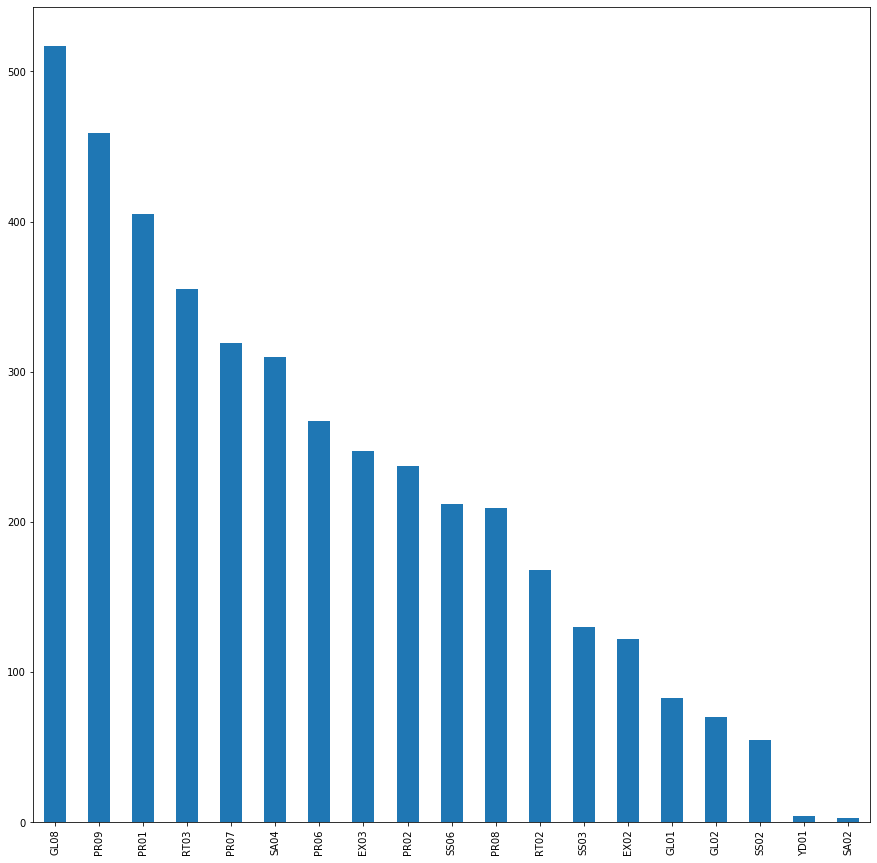

In [8]:
df['error_code'].value_counts().plot(x = 'error_code', 
                                     y = 'frequency', 
                                     kind = 'bar', 
                                     figsize = (15, 15))

### Frequency of errors based on error names

In [7]:
pandas.DataFrame(df['error_name'].value_counts().head())

,error_name
The object does not have a docstring,517
Return value has no description,355
Summary should fit in a single line,212
"The first line of the Returns section should contain only the type, unless multiple values are being returned",168
"Parameters {**kwargs, *args} not documented",163
